# Logistic Regression - Titanic Dataset from Kaggle

### A). Project Overview

For this lecture we will be working with the Titanic Data Set from Kaggle. This is a very famous data set and very often is a student's first step in machine learning!

We'll be trying to predict a classification- survival or deceased. Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.


################################################################################

#### Variable	:Definition	Key


survival	:Survival	0 = No, 1 = Yes
pclass	    :Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	        :Sex	
Age	        :Age in years	
sibsp	    :# of siblings / spouses aboard the Titanic	
parch	    :# of parents / children aboard the Titanic	
ticket	    :Ticket number	
fare	    :Passenger fare	
cabin	    :Cabin number	
embarked	:Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton:

### B). Import required packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Read the data

In [3]:
train = pd.read_csv("Input_Data/titanic_train.csv")

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### C). Exploratory Data Analysis

#### C1). Check the missing data in dataframe

In [5]:
#create a boolean frame with missing data

train.isnull().head()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0        False     False   False  False  False  False  False  False   False   
1        False     False   False  False  False  False  False  False   False   
2        False     False   False  False  False  False  False  False   False   
3        False     False   False  False  False  False  False  False   False   
4        False     False   False  False  False  False  False  False   False   

    Fare  Cabin  Embarked  
0  False   True     False  
1  False  False     False  
2  False   True     False  
3  False  False     False  
4  False   True     False

#### C2). Use Seabron to create a simple heatmap to see where we are missing data

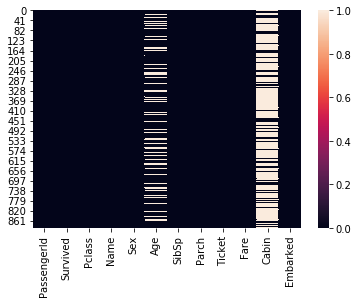

In [6]:
#without customization
sns.heatmap(train.isnull())

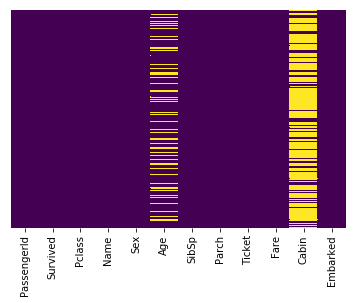

In [7]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

> `Age Column` : Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Filling the missing with avereage age of same aged people.

> `Cabin Column` : Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

In [10]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

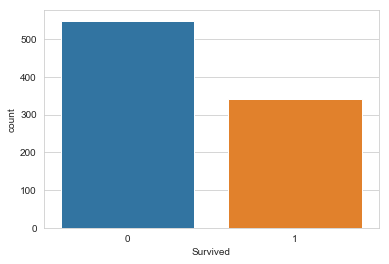

In [13]:
#apply count plot on Survived column: 0 for not survived, 1 for Survived 

sns.set_style('whitegrid')
sns.countplot(data =train, x='Survived')

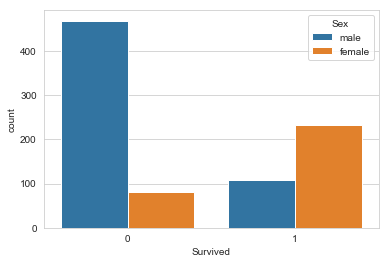

In [24]:
#Apply countplot with hue as sex for Survived column

sns.countplot(data=train, x='Survived', hue='Sex')

#Note: Male count more in not survival 

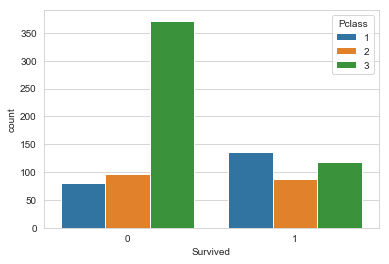

In [25]:
#Plot the graph for Survival column with hue as PClass column

sns.countplot(data=train, x='Survived', hue='Pclass')

#Notes: 3rd class people not survival chances are very less

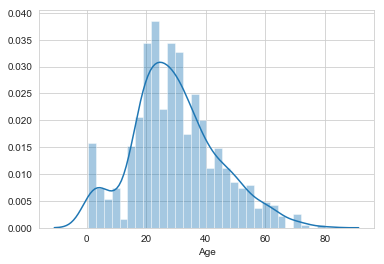

In [35]:
#Plot distplot for Age column by dropping missing data

sns.distplot(train['Age'].dropna(), bins=30)

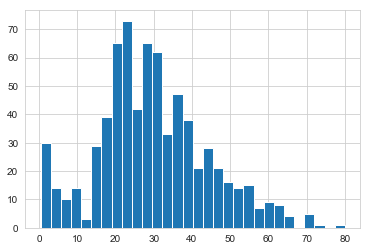

In [36]:
#Try above step with Pandas buildin function

train['Age'].hist(bins=30)

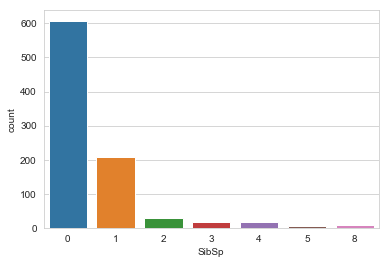

In [38]:
#check the counts of siblings onboarded 

sns.countplot(data=train, x='SibSp')

#note: most of the passengers are singles and having 1Spouse/sibling

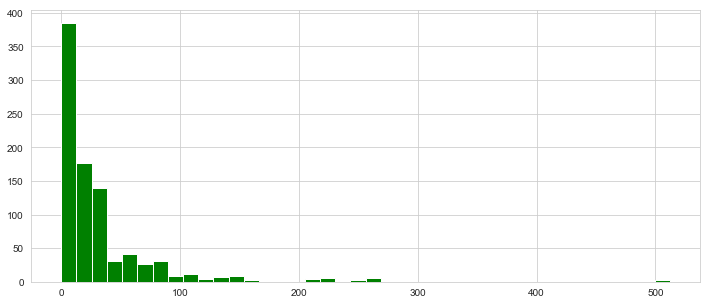

In [42]:
#check the fare column, how many passengers taken what kind of ticket range

train['Fare'].hist(bins=40, color='green', figsize=(12,5))